### Сборный проект

#### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Цель: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Доступны данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

#### Инструкция по выполнению проекта
1. Импорт данных, изучение общей информации
Путь к файлу: /datasets/games.csv. 
2. Подготовка данных
* Замена названий столбцов (приведение к нижнему регистру);
* Преобразование данных в нужные типы;
3. Исследовательский анализ данных
* Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Как менялись продажи по платформам. 
* Определение акиуального периода
* Выбор потенциально прибыльных платформ.
* График «ящик с усами» по глобальным продажам игр в разбивке по платформам.
* Анализ влияния продаж внутри одной популярной платформы отзывов пользователей и критиков. 
* Соотнесение выводов с продажами игр на других платформах.
* Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах?
4. Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишем различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?
Шаг 5. Проверьте гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Шаг 6. Напишите общий вывод

#### Общая информация о содержащихся в файле данных

In [1]:
#импорт необходимых библиотек 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import random

In [2]:
#импорт данных
try:
    data = pd.read_csv('C:/Users/Sveta/Downloads/games.csv')

except FileNotFoundError:
    data = pd.read_csv('/datasets/games.csv')
print (data.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* Требуется перевод названий всех колонок к нижнему регистру.
* Перевод столбца year_of_release к типу integer 
* Перевод столбца user_score к типу float

In [4]:
data.columns = data.columns.str.lower() #перевод к нижнему регистру

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
missing_data = (data.isna().mean()*100).round(2) #оценка процента пропусков в столбцах

In [7]:
missing_data

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

* Наибольший процент пропусков (51,3%) в столбце с оценкой критиков
* 40% пропусков в столбцах с оценкой пользователей и с рейтингом организации ESRB
* Небольшой процент пропусков в столбце с годом выпуска (1,6%)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Выводы по анализу общей информации:
* Необходимо привести к правильному типу столбец Year of Release.
* Привести к нижнему регистру названия столбцов
* Наибольший процент пропусков (51,3%) в столбце с оценкой критиков
* 40% пропусков в столбцах с оценкой пользователей и с рейтингом организации ESRB
* Небольшой процент пропусков в столбце с годом выпуска (1,6%)

#### Подготовка данных, проверка на аномалии

In [9]:
data['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

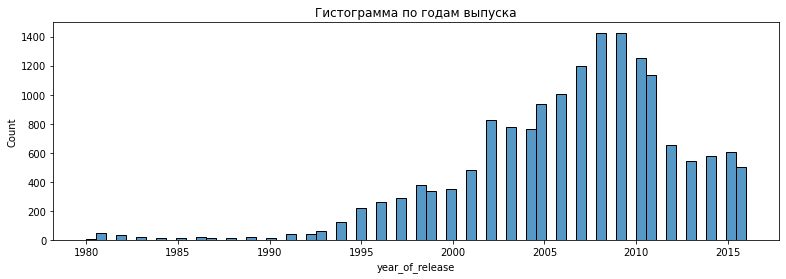

In [10]:
plt.figure(figsize=(13,4))
data['year_of_release'] = data['year_of_release'].astype('Int64')
sns.histplot(data['year_of_release'])
plt.title('Гистограмма по годам выпуска')
plt.show()

* Аномалии данных столбца year_of_release не выявлены
* Пиковые значения количества выпущенных игр приходятся на 2008 и 2009 годы, далее происходит снижение
* Рост количества выпущенных игр начинается после 1991, это согласуется с ростом технического оснащения пользователей - появлением большего количества компьютеров 


In [11]:
data['na_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

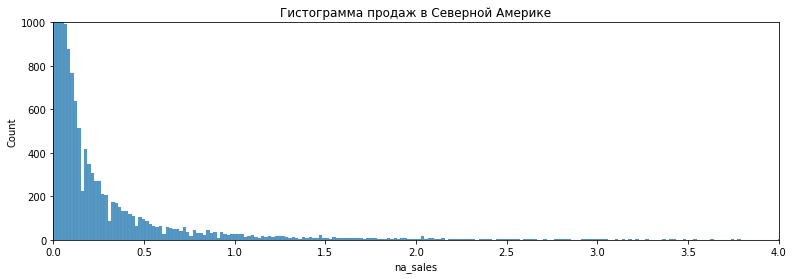

In [12]:
plt.figure(figsize=(13,4))
sns.histplot(data, x = 'na_sales')
plt.title('Гистограмма продаж в Северной Америке')
plt.ylim([0, 1000])
plt.xlim([0, 4])
plt.show()

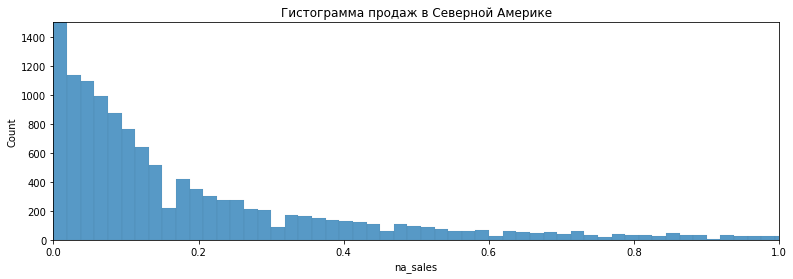

In [13]:
plt.figure(figsize=(13,4))
sns.histplot(data, x = 'na_sales')
plt.title('Гистограмма продаж в Северной Америке')
plt.ylim([0, 1500])
plt.xlim([0, 1])
plt.show()

* Среднее значение продаж в Северной Америке: 0,26 млн копий
* Максимальное значение 41,36 млн копий может быть аномальным значением (значение третьего квартиля: 0.24 млн. копий)

In [14]:
data['eu_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

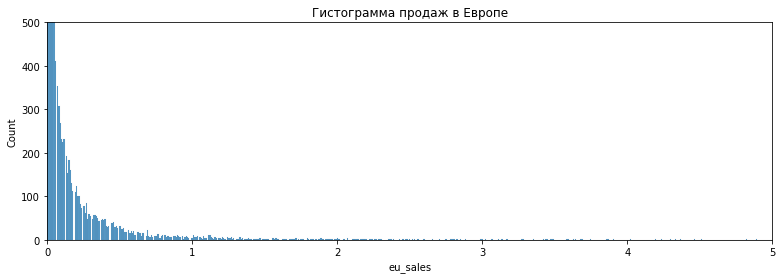

In [15]:
plt.figure(figsize=(13,4))
sns.histplot(data['eu_sales'])
plt.title('Гистограмма продаж в Европе')
plt.xlim([0, 5])
plt.ylim([0, 500])
plt.show()

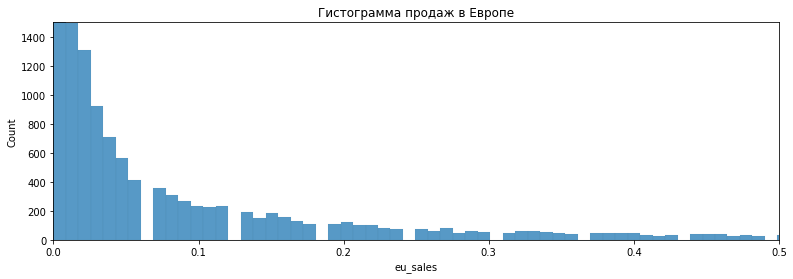

In [16]:
plt.figure(figsize=(13,4))
sns.histplot(data['eu_sales'])
plt.title('Гистограмма продаж в Европе')
plt.xlim([0, 0.5])
plt.ylim([0, 1500])
plt.show()

* В Европе среднее значение продаж: 0.14 млн копий
* Максимальное значение 28.9 млн копий, может быьб аномальным значением (значение третьего квартиля 0.11 млн копий\

In [17]:
data['jp_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

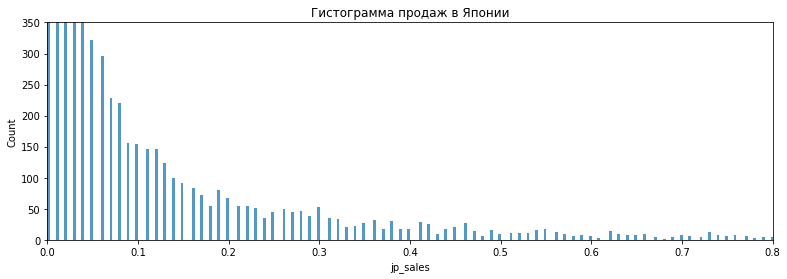

In [18]:
plt.figure(figsize=(13,4))
sns.histplot(data['jp_sales'])
plt.title('Гистограмма продаж в Японии')
plt.ylim([0, 350])
plt.xlim([0, 0.8])
plt.show()

* Среднее значение продаж в Японии: 0.077 млн. копий
* Максимальное значение составляет 10.22 млн копий

In [19]:
data['other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

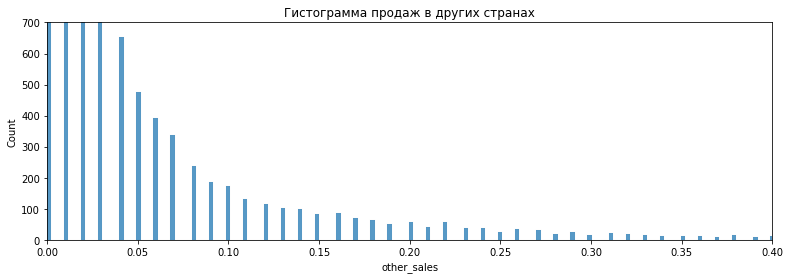

In [20]:
plt.figure(figsize=(13,4))
sns.histplot(data, x = 'other_sales')
plt.title('Гистограмма продаж в других странах')
plt.ylim([0, 700])
plt.xlim([0, 0.4])
plt.show()

* Среднее значение продаж в других странах 0.047 млн экземпляров
* Максимальное значение продаж в других странах 10.57 млн экземпляров 

In [21]:
data['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

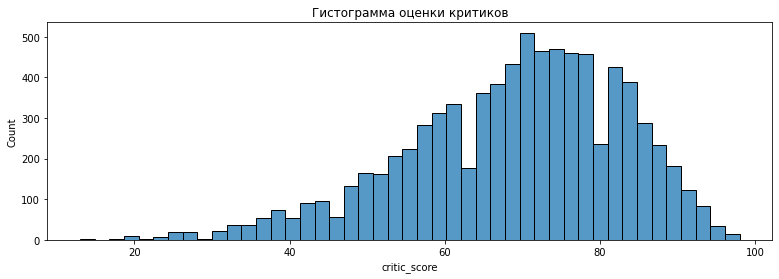

In [22]:
plt.figure(figsize=(13,4))
sns.histplot(data, x = 'critic_score')
plt.title('Гистограмма оценки критиков')
plt.show()

* Гистограмма оценки критиков позволяет сделать вывод о том, что аномалий данных в столбце critic_score нет
* Среднее значение оценки критиков составлят 68.9

In [23]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

* Аббревиатура tbd применительно в компьютерным играм расшифровывается как To Be Determined, то есть "Будет определено" 
* Т.о. можно заменить значения tbd на nan
* Необходимо поменять тип данных в столбце на float

In [24]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True) 
# замена значения tbd на nan
data['user_score'] = data['user_score'].astype(np.float64)
# замена типа данных

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Кстати, можно использовать метод to_numeric с параметром errors='coerce'. Тогда все нечисловые значения сразу заменятся на nan и не придется отдельно обрабатывать tbd, [документация](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html)
</div>

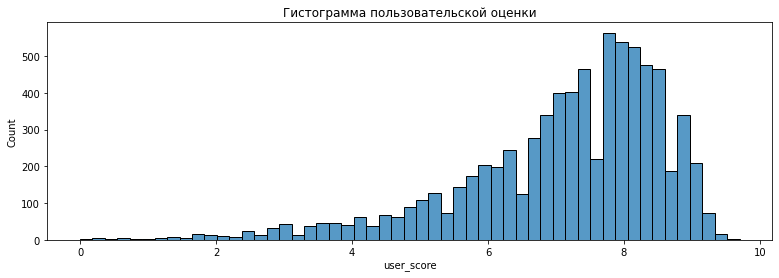

In [25]:
plt.figure(figsize=(13,4))
sns.histplot(data, x = 'user_score')
plt.title('Гистограмма пользовательской оценки')
plt.show()

* Гистограмма оценки пользователей позволяет сделать вывод о том, что аномалий данных в столбце user_score нет
* Среднее значение оценки пользователей составлят 7.1

In [26]:
data['rating'].sort_values(ascending = True).unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [27]:
data[data['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [28]:
data[data['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [29]:
data[data['user_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [30]:
data['name'].sort_values(ascending = True).unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

In [31]:
data[data['name'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


* Данные столбца name пропущены только в двух случаях

In [32]:
data['platform'].sort_values(ascending = True).unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

* Пропусков данных в столбце platform не обнаружено

In [33]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [34]:
data['genre'].sort_values(ascending = True).unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [35]:
data[data['genre'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [36]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

* Данные столбца genre пропущены только в двух случаях, в тех же случаях что и пропуски столбца name

In [37]:
data.duplicated().sum() #проверка на наличие дубликатов

0

In [38]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display (data.head())
#формирование нового столбца sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Проанализируем данные строк с пропусками с столбце year_of_release и рассмотрим возможные дубликаты по названию игры и платформам

In [39]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,0.01
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [40]:
data.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
1881,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E,1.09
3889,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E,0.51
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E,0.31


Рассмотрим игру Madden NFL 2004, которая была представлена в 2003 году на 4х различных платформах. Доля продаж для каждой из платформ различна, отличаются пользовательский рейтинг и рейтинг критиков.

In [41]:
data.query('name == "FIFA Soccer 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
2606,FIFA Soccer 2004,XB,2003,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E,0.78
12029,FIFA Soccer 2004,GC,2003,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E,0.06
13086,FIFA Soccer 2004,GBA,2003,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E,0.05


In [42]:
data.query('name == "LEGO Batman: The Videogame"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
397,LEGO Batman: The Videogame,X360,2008,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+,3.38
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+,3.06
460,LEGO Batman: The Videogame,DS,2008,Action,1.75,1.01,0.0,0.29,72.0,8.0,E10+,3.05
1519,LEGO Batman: The Videogame,PS3,2008,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+,1.30
1538,LEGO Batman: The Videogame,PSP,<NA>,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+,1.28
1553,LEGO Batman: The Videogame,PS2,2008,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+,1.27
12465,LEGO Batman: The Videogame,PC,2008,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+,0.06


* Одни и те же игры могут быть реализованы на разных платформах, при этом, рейтинги критиков и пользователей могут быть различны.
* Повторяющиеся названия игр на разных платформах необходимо оставить, т.к. они отражают уровень продаж игры на конкретной платфорке и для различных платформ уровень продаж отличается
* Данные повторяющихся игр можно использовать для заполнения части пропусков  столбца year_of_release.


In [43]:
#заполнение части пропусков столбца year_of_release
for i in data[data['year_of_release'].isnull() == True].index:  
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()

In [44]:
data['year_of_release'].isna().sum()

146

Т.о. удалось заполнить часть столбцов с пропусками информации о годах выпуска игр.

In [45]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### Общий вывод по подготовке данных

* Процент пропусков данных столбца critic_score 51.32%
* Процент пропусков данных столбца user_score 40.09%
* Процент пропуска данных столбца rating 40.48%
* Данные рейтингов, как правило, пропущены во всех указанных столбцах одновременно
* Заполнить такой высокий процент пропусков адекватно не представляется возможным, на данном этапе можно оставить столбца в том виде, в котором они уже есть

* Пропуски в катрегориальных признаках присуствуют в двух ячейках, данный других столбцов недостаточно для того, чтобы предположить, каким образом их можно заполнить
* Предлагается их не учитывать 
* Причина появления пропусков столбцов name и genre носит случайный характер, возможно, сыграл свою роль человеческий фактор при заполнении таблицы или сбой при переносе данных, предшествующий созданию итогового датасета
* Для более подробного анализа пропусков в столбцах с пользовательским рейтингом и рейтингом критиков требуется уточняющая информация, которую рассмотрим далее

In [46]:
# удаление строк с пропусками в столбцах name и genre 

data = data.drop(labels = [659,14244],axis = 0)

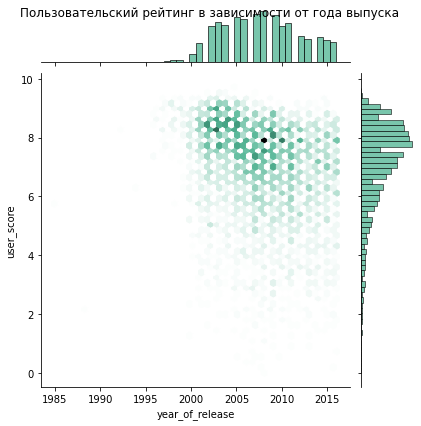

In [47]:
#анализ зависимости пользовательского рейтинга от года выпуска 

sns.jointplot(data = data, x='year_of_release', 
    y='user_score', kind="hex", color="#4CB391")

plt.suptitle("Пользовательский рейтинг в зависимости от года выпуска")
plt.show()

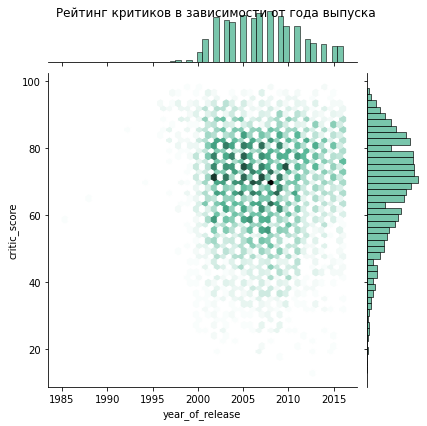

In [48]:
#анализ зависимости критиков от года выпуска 

sns.jointplot(data = data, x='year_of_release', 
    y='critic_score', kind="hex", color="#4CB391")

plt.suptitle("Рейтинг критиков в зависимости от года выпуска")
plt.show()

* На основании полученных зависимостей можно сделать вывод, что активная фаза формирования рейтинга игр приходится на период после 2000 года, когда игры получают широкое распространение
* Принцип по которому заполнить пропуски в данном случае сложно определить 
* После анализа количества игр, которые выпускались в разные годы и выбора актуального периода имеет смысл проанализировать повторно пропуски столбцов пользовательного рейтинга и рейтинга критиков в пределах актуального для рассмотрения в рамках задачи периода

Рейтинг ESRB начал присуждаться играм после 1994 года. В связи с тем, что нет возможности вручную проверить каждую игру на возрастную группу, к которой она относится в соответствии с рейтингом, заменим недостающие значения значением "undefined" 

In [49]:
# заполнение недостающих значений столбца rating значением M (для взрослых)

data['rating'] = data['rating'].fillna('undefined')

#### Исследовательский анализ данных

Анализ данных по количеству игр, которые выпускались в разные годы. 

In [50]:
data_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
data_year.columns = ['count']

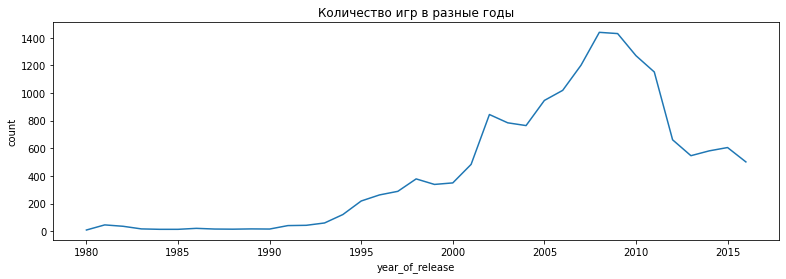

In [51]:
plt.figure(figsize=(13,4))
sns.lineplot(data = data_year, x = 'year_of_release', y = 'count')
plt.title('Количество игр в разные годы')
plt.show()

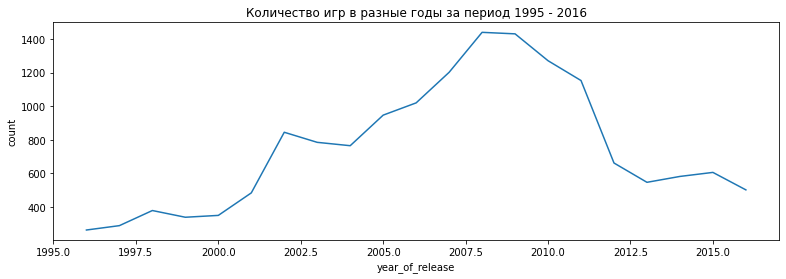

In [52]:
plt.figure(figsize=(13,4))
sns.lineplot(data = data_year.query('year_of_release > 1995'), x = 'year_of_release', y = 'count')
plt.title('Количество игр в разные годы за период 1995 - 2016')
plt.show()

Вывод:
* Максимальное значение выпущенных игр приходится на 2007 - 2008 годы.
* С начала 90-х годов количество игр начинает ежегодно расти быстрыми темпоми. Можно попробовать это объяснить развитием технологий, появлением возможностей для покупки игр у большого числа пользователей. Данный рост продолжается до 2008 года. 
* На дальнейшее развитие игр (после 2008 года) мог повлиять финансовый кризис 2008 года


#### Изменения продаж по платформам. Выбор платформы с наибольшими суммарными продажами 

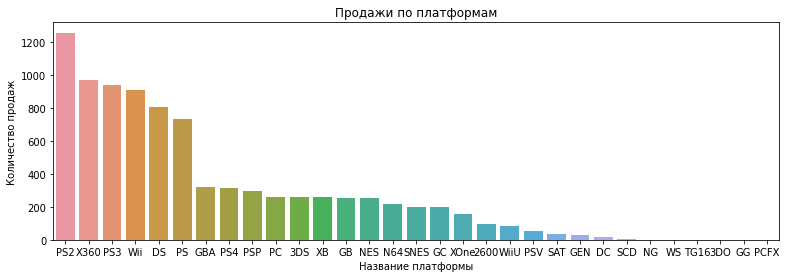

In [53]:
sales_platform = data.pivot_table(index='platform', values='sales', aggfunc='sum').sort_values(
    by='sales', ascending=False)

plt.figure(figsize=(13,4))
sns.barplot(x=sales_platform.index,y=sales_platform['sales'])
plt.title("Продажи по платформам")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

Cамые популярные игровые платформы за весь период: PS2, X360, PS3, WII, DS, PS.


In [54]:
platform_grouped = sales_platform.reset_index()
top_platforms = platform_grouped['platform'].unique()
top_platforms_10 = top_platforms[:10]
top_platforms_10

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'],
      dtype=object)

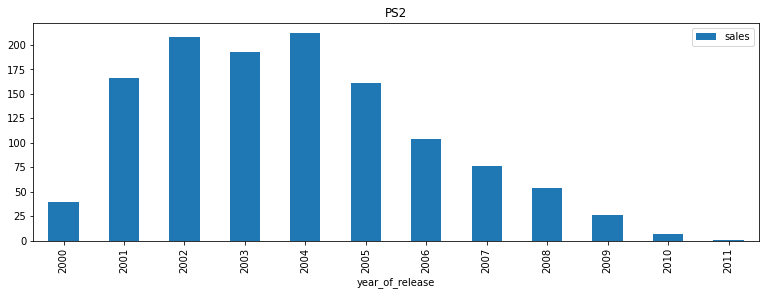

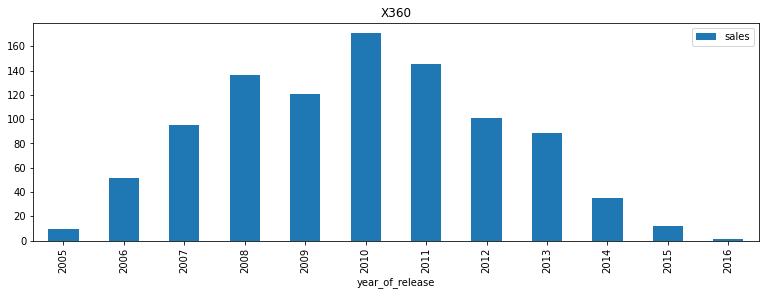

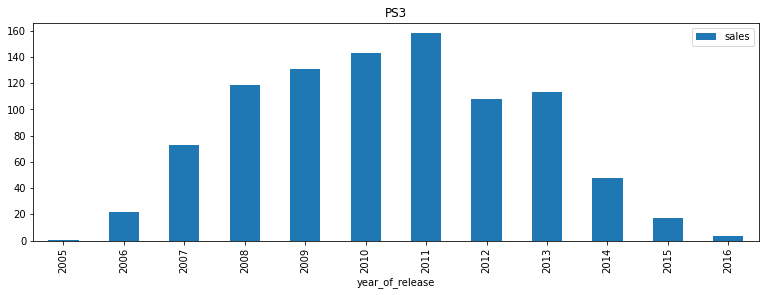

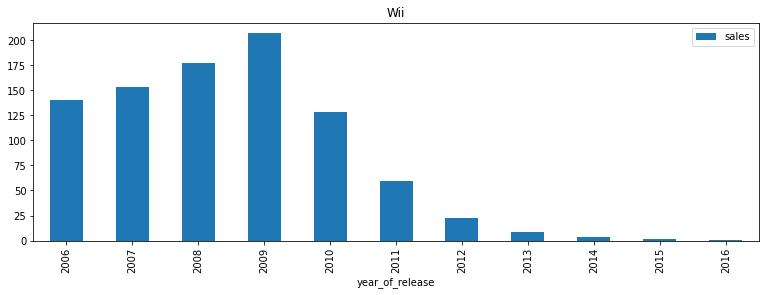

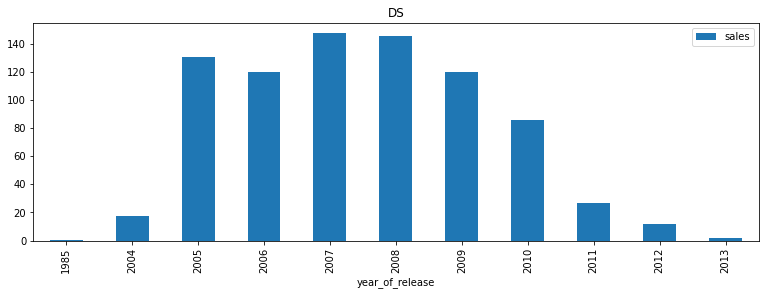

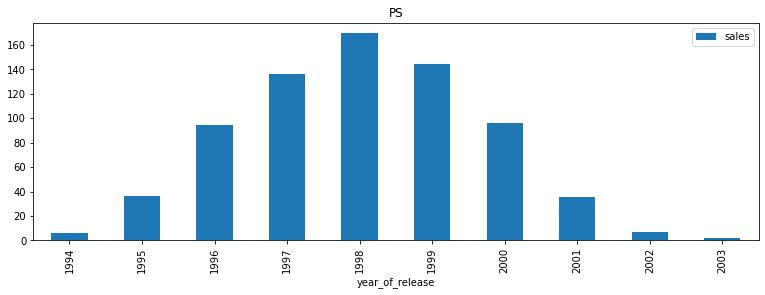

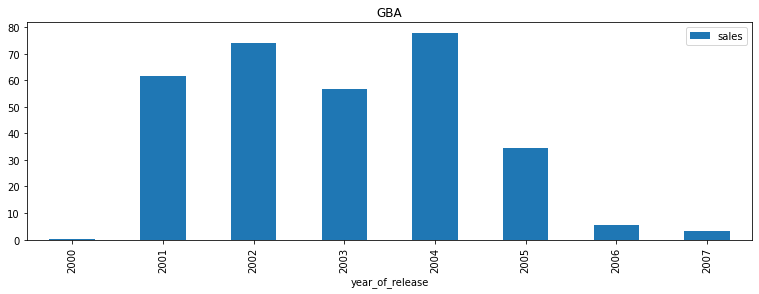

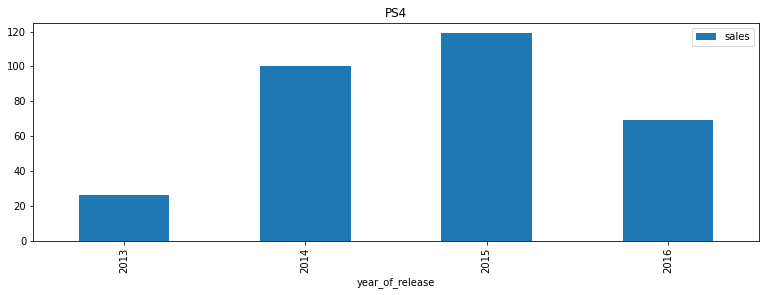

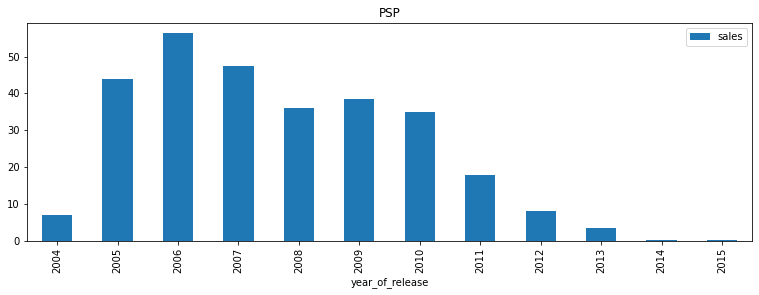

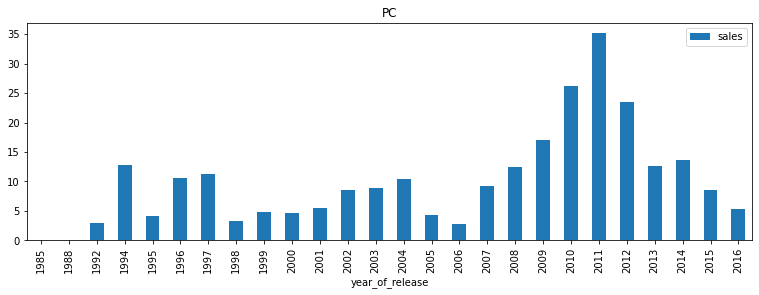

In [55]:
for platform in top_platforms_10:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

In [56]:
top_5 = sales_platform.head(5)
top_5 = top_5.reset_index().rename_axis(None, axis=1)


In [57]:
top_5

,platform,sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


Выводы:

* Средний период активной фазы развития платформ длится приблизительно 5 лет: период начала роста популярности и тенденции к снижению популярности
* Полный цикл проявления интереса к игре составляет 7-10 лет до полного затухания
* Топ 10 платформы с максимальными продажами за весь период уже не актуальны на момент 2016 года. 
* Для дальнейшего анализа требуется выбрать промежуток данных с учетом выявленного периода активной фазы развития платформ

#### Выбор периода данных для дальнейшего исследования
* В качестве выбора периода данных выбран промежуток 2007 - 2016 год как наиболее показательный, и затрагивающий как рост, так и спад популярности игр

In [58]:
period_data = data[(data['year_of_release'] > 2009) & (data['year_of_release'] < 2016)]
period_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,undefined,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01


In [59]:
sales_platform_period = period_data.pivot_table(index=['platform','year_of_release'], values='sales', aggfunc='sum').sort_values(
    by='sales', ascending=False)
sales_platform_period.columns = ['sales']

In [60]:
sales_platform_period

sales
platform year_of_release        
X360     2010             170.55
PS3      2011             157.98
X360     2011             145.23
PS3      2010             142.96
Wii      2010             128.67
PS4      2015             118.90
PS3      2013             113.25
         2012             108.28
X360     2012             100.72
PS4      2014             100.00
X360     2013              88.58
DS       2010              85.35
3DS      2011              63.20
XOne     2015              60.14
Wii      2011              59.79
3DS      2013              56.57
XOne     2014              54.07
3DS      2012              51.76
PS3      2014              47.76
3DS      2014              43.76
PC       2011              35.16
PSP      2010              35.04
X360     2014              34.74
3DS      2015              27.78
DS       2011              26.33
PC       2010              26.15
PS4      2013              25.99
PC       2012              23.45
Wii      2012              22.94
WiiU     2014              22.03
         2013              21.65
XOne     2013              18.96
PSP      2011              17.82
WiiU     2012              17.56
PS3      2015              16.82
WiiU     2015              16.35
PSV      2012              16.19
PC       2014              13.63
         2013              12.66
X360     2015              11.96
PSV      2014              11.90
DS       2012              11.67
PSV      2013              10.59
Wii      2013               8.59
PC       2015               8.52
PSP      2012               7.95
PS2      2010               6.59
PSV      2015               6.25
         2011               4.63
Wii      2014               3.75
PSP      2013               3.38
DS       2013               1.54
Wii      2015               1.14
PS2      2011               0.45
3DS      2010               0.32
PSP      2014               0.24
         2015               0.12

In [61]:
sales_platform_period = period_data.pivot_table(index='platform', values='sales', aggfunc='sum').sort_values(
    by='sales', ascending=False)

In [62]:
platform_grouped_period = sales_platform_period.reset_index()
top_platforms_period = platform_grouped_period['platform'].unique()
top_platforms_period  = top_platforms_period[:10]

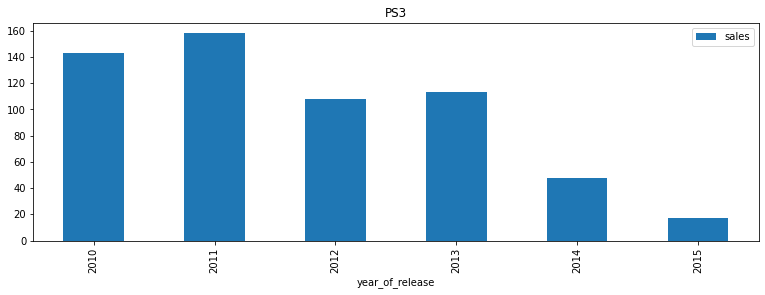

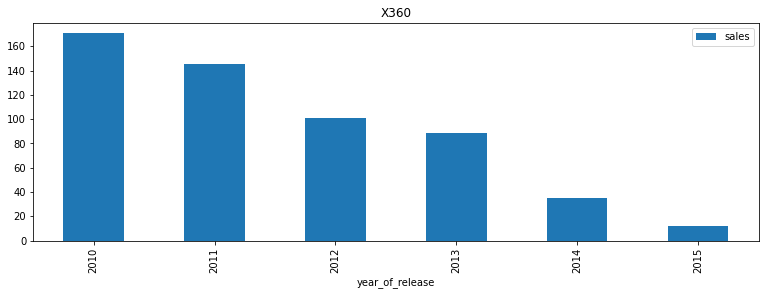

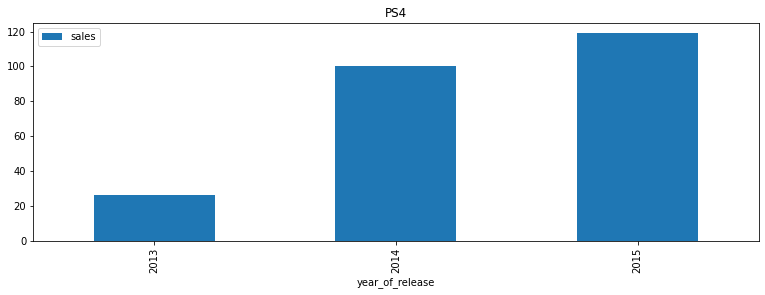

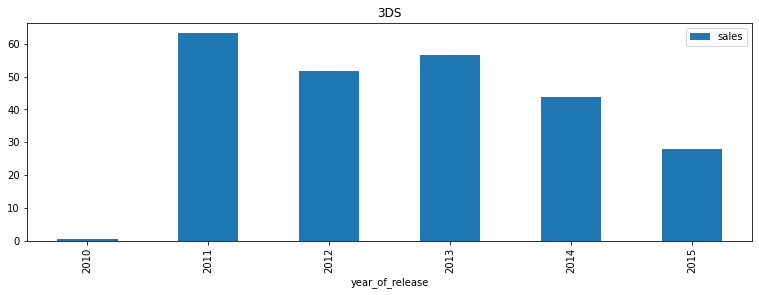

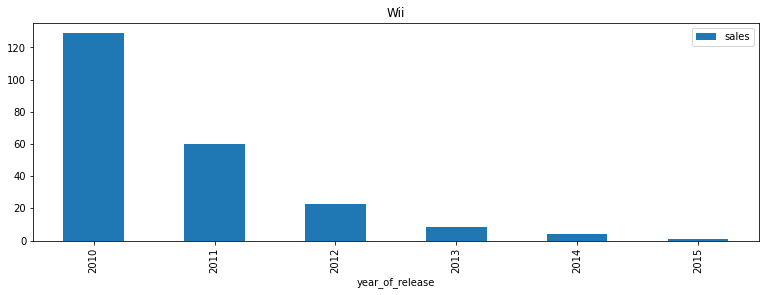

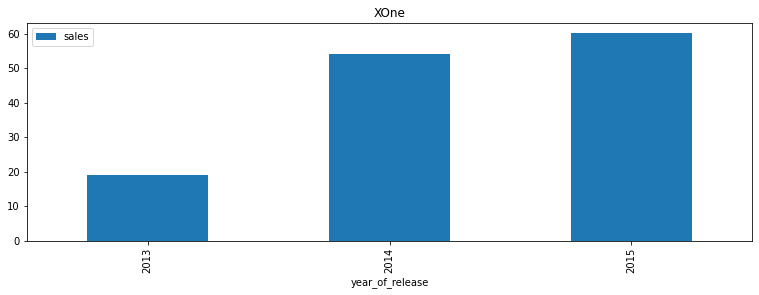

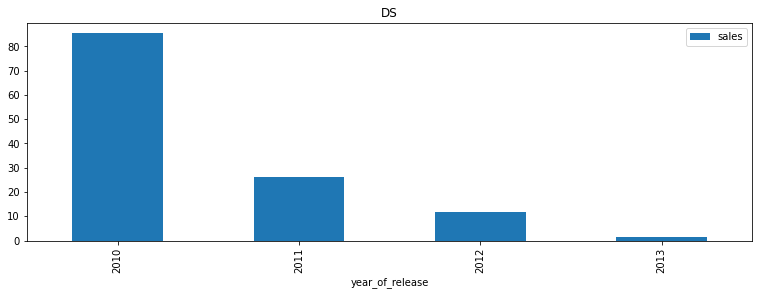

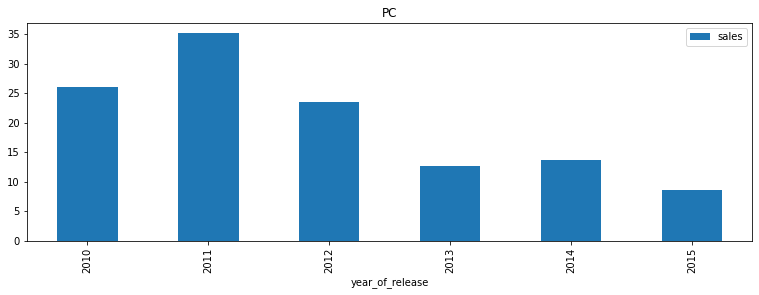

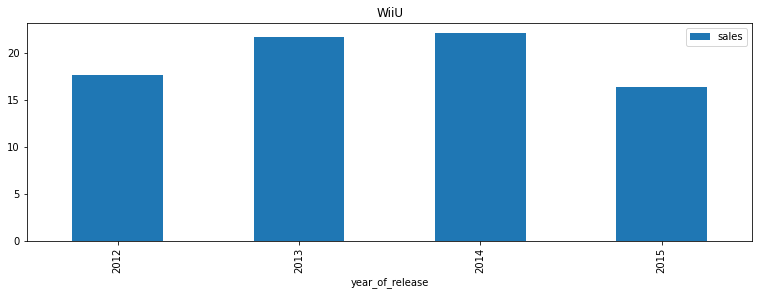

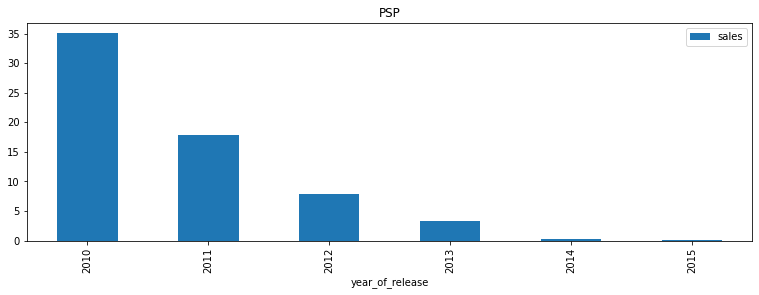

In [63]:
for platform in top_platforms_period:
    period_data[period_data['platform'] == platform].pivot_table(index='year_of_release', values='sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

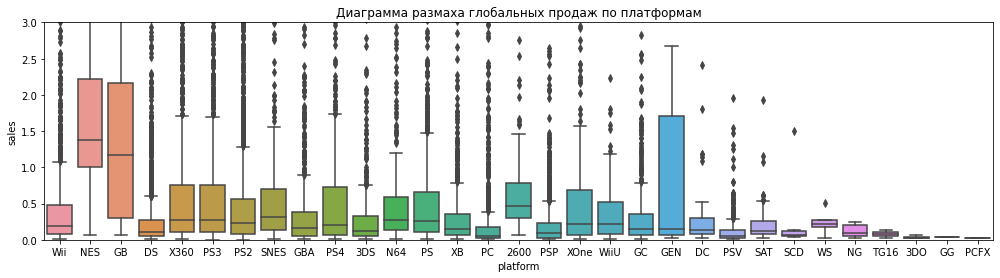

In [64]:
plt.figure(figsize=(17,4))
sns.boxplot (x = 'platform', y = 'sales', 
             data = data, 
             width = 0.8)

plt.title('Диаграмма размаха глобальных продаж по платформам')
plt.ylim([0, 3])
plt.show()

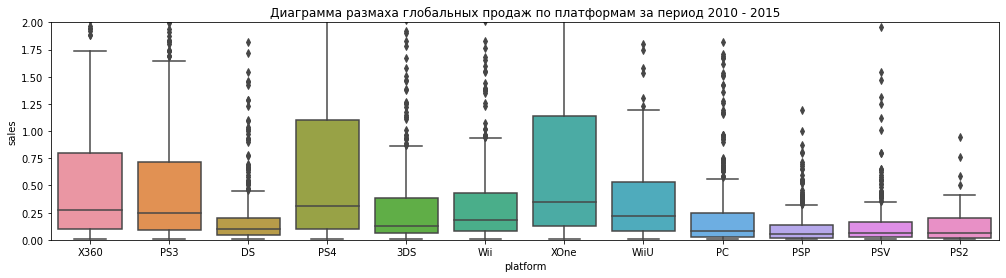

In [65]:
plt.figure(figsize=(17,4))
sns.boxplot (x = 'platform', y = 'sales', 
             data = period_data, 
             width = 0.8)

plt.title('Диаграмма размаха глобальных продаж по платформам за период 2010 - 2015')
plt.ylim([0, 2])
plt.show()

* Медианные значения продаж больше всего за период 2010 - 2015 выше всего у платформ XOne, PS4, WiiU, X 360
* Наименьшие медианные значения продаж за выбранный период у платформ PSP, PSV, PS2
* Для платформ X360, PS3, PS4, XOne, WiiU явно выражено различие значений верхнего и нижнего квартиля: доля верхнего квартиля значительно выше, чем нижнего, что указывает на пик продаж в пределах указанного периода.

#### Оценка влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков.

In [66]:
data_Wii = data[data['platform']=='Wii']

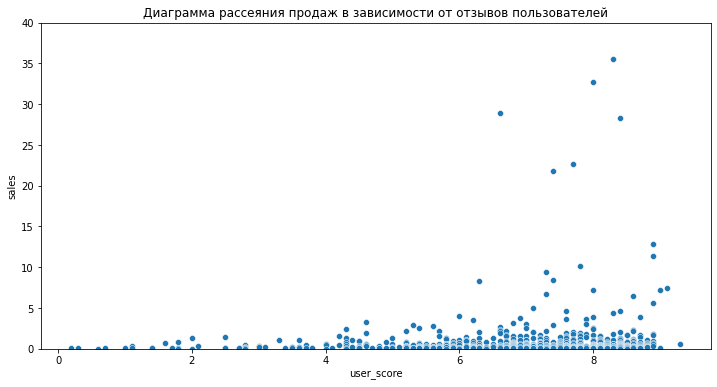

In [67]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data_Wii, x='user_score', y='sales')
plt.title('Диаграмма рассеяния продаж в зависимости от отзывов пользователей')
plt.ylim([0, 40])
plt.show()

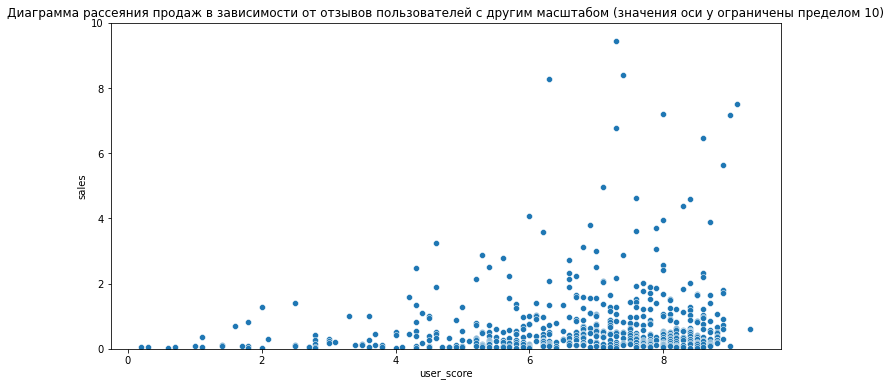

In [68]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data_Wii, x='user_score', y='sales')
plt.title('Диаграмма рассеяния продаж в зависимости от отзывов пользователей с другим масштабом (значения оси y ограничены пределом 10)')
plt.ylim([0, 10])
plt.show()

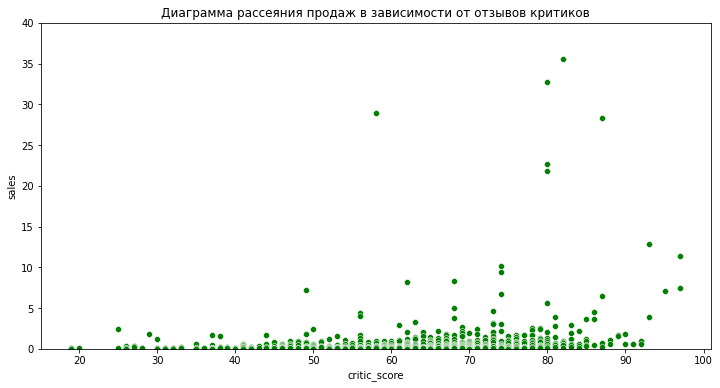

In [69]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data_Wii, x='critic_score', y='sales', color = 'g')
plt.title('Диаграмма рассеяния продаж в зависимости от отзывов критиков')
plt.ylim([0, 40])
plt.show()

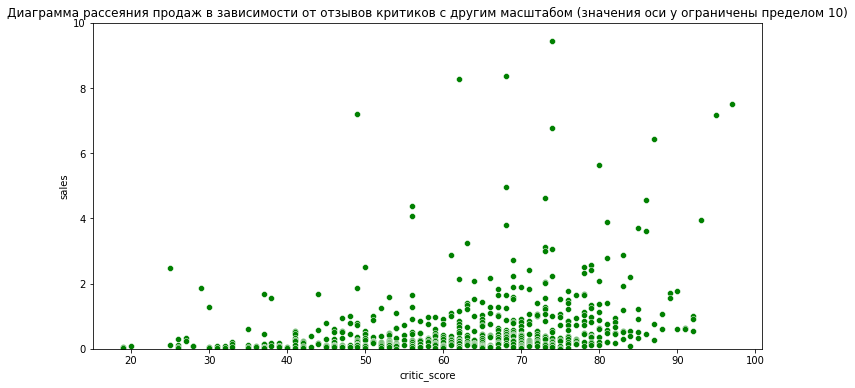

In [70]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data_Wii, x='critic_score', y='sales', color = 'g')
plt.title('Диаграмма рассеяния продаж в зависимости от отзывов критиков с другим масштабом (значения оси y ограничены пределом 10)')
plt.ylim([0, 10])
plt.show()

In [71]:
corr_Wii_user = data_Wii['user_score'].corr(data_Wii['sales']).round(2)
print ('Корреляция между оценками пользователей и продажами', corr_Wii_user)

Корреляция между оценками пользователей и продажами 0.11


In [72]:
corr_Wii_critic = data_Wii['critic_score'].corr(data_Wii['sales']).round(2)
print ('Корреляция между оценками критиков и продажами', corr_Wii_critic)

Корреляция между оценками критиков и продажами 0.18


In [73]:
#Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции
def correlation_score(platform_name):
    platform = period_data[period_data['platform']==platform_name]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='sales', data=platform, ax=ax[1])
    fig.suptitle(platform_name)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    corr_user = platform['user_score'].corr(platform['sales']).round(2)
    corr_critic = platform['critic_score'].corr(platform['sales']).round(2)
    print('Корреляция между оценками пользователей и продажами', corr_user)
    print('Корреляция между оценками критиков и продажами', corr_critic)
    
    print('\n')

In [74]:
sales_platform_period2 = period_data.pivot_table(index='platform', values='sales', aggfunc='sum').sort_values(
    by='sales', ascending=False)

In [75]:
platform_grouped2 = sales_platform_period2.reset_index()
top_platforms = platform_grouped2['platform'].unique()
top_platforms_10 = top_platforms[:10]
top_platforms_10

array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'XOne', 'DS', 'PC', 'WiiU',
       'PSP'], dtype=object)

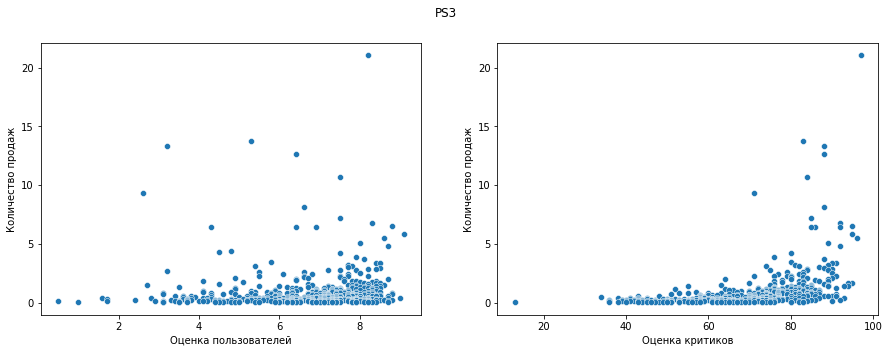

Корреляция между оценками пользователей и продажами 0.05
Корреляция между оценками критиков и продажами 0.4




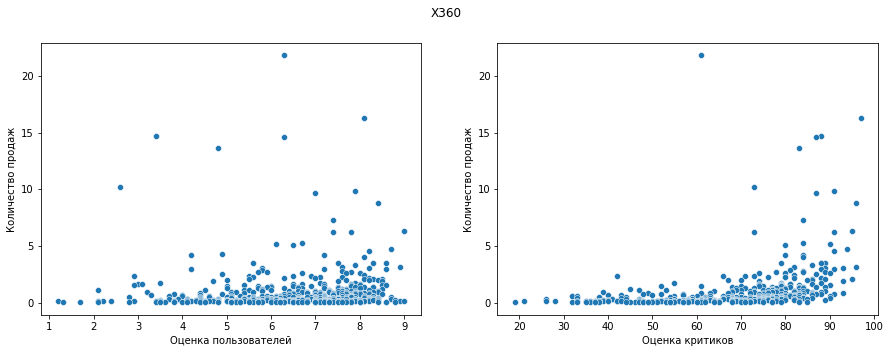

Корреляция между оценками пользователей и продажами 0.06
Корреляция между оценками критиков и продажами 0.34




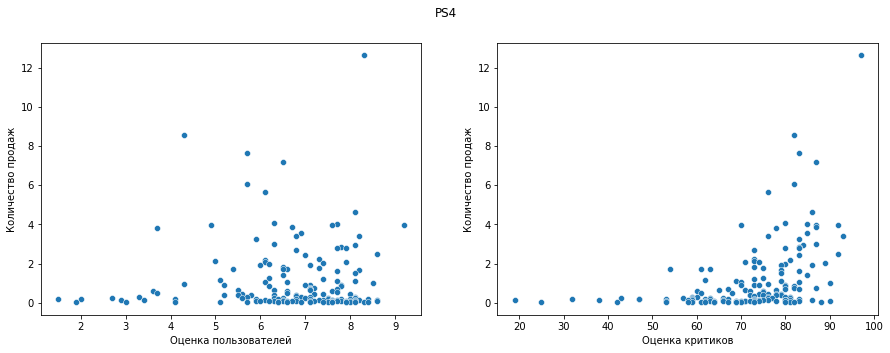

Корреляция между оценками пользователей и продажами 0.02
Корреляция между оценками критиков и продажами 0.43




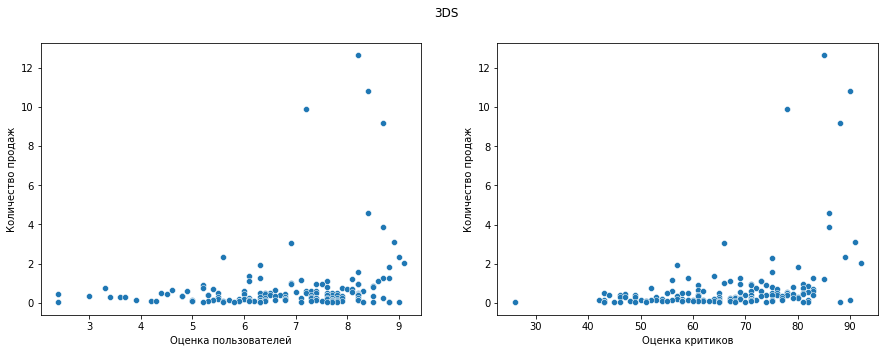

Корреляция между оценками пользователей и продажами 0.23
Корреляция между оценками критиков и продажами 0.36




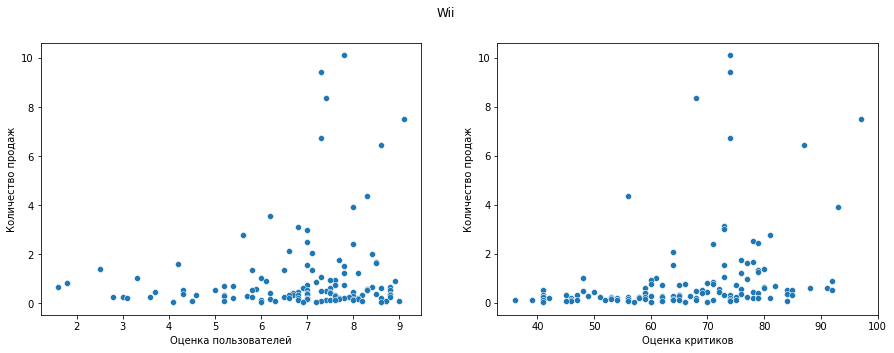

Корреляция между оценками пользователей и продажами 0.15
Корреляция между оценками критиков и продажами 0.31




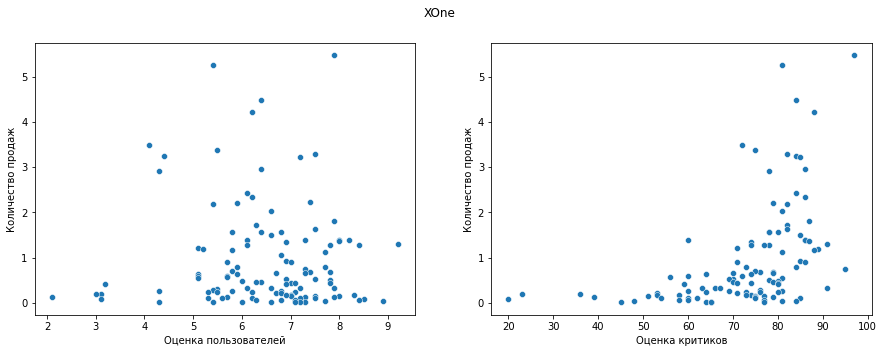

Корреляция между оценками пользователей и продажами -0.04
Корреляция между оценками критиков и продажами 0.46




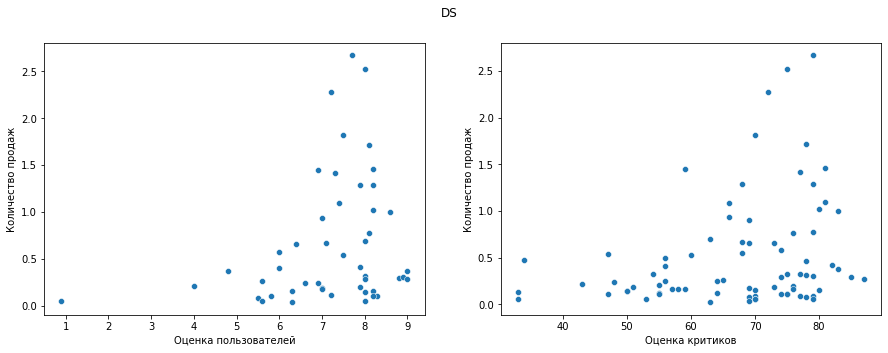

Корреляция между оценками пользователей и продажами 0.25
Корреляция между оценками критиков и продажами 0.28




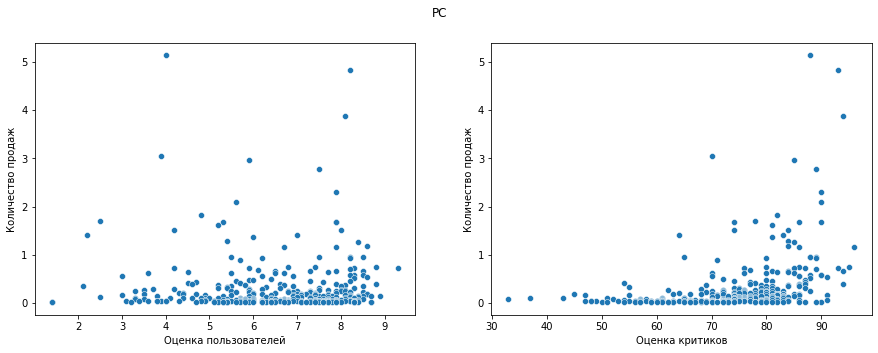

Корреляция между оценками пользователей и продажами -0.03
Корреляция между оценками критиков и продажами 0.36




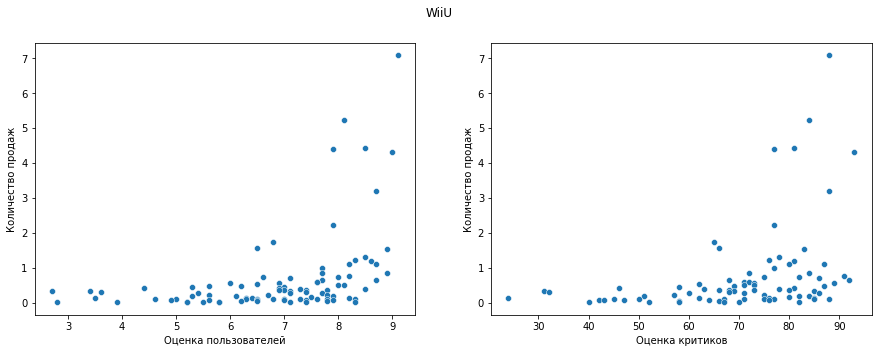

Корреляция между оценками пользователей и продажами 0.41
Корреляция между оценками критиков и продажами 0.35




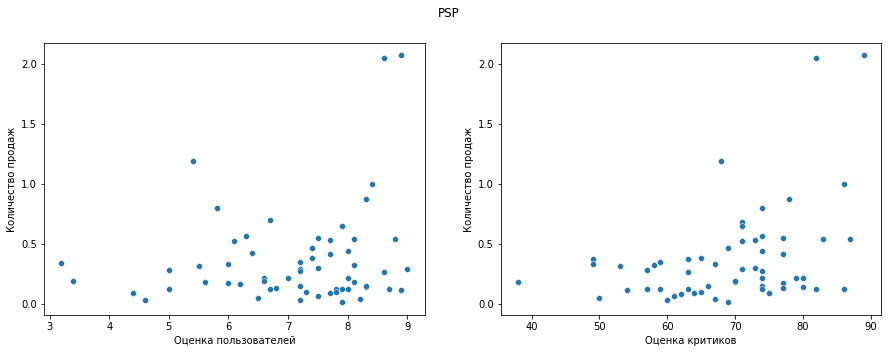

Корреляция между оценками пользователей и продажами 0.19
Корреляция между оценками критиков и продажами 0.4




In [76]:
for platform in top_platforms[:10]:
    correlation_score(platform)

#### Вывод: 
* У PS4, Xbox One, WiiU, 3DS наблюдается незначительгная связь между оценками критиков и продажами. 
* Связь между оценками пользователей и продажами слабая у всех платформ, либо её совсем нет.

#### Распределение игр по жанрам.

In [77]:
game_genre = period_data.pivot_table(index='genre', values='sales', aggfunc='sum').sort_values(
    by='sales', ascending=False).reset_index().rename_axis(None, axis=1)
game_genre

,genre,sales
0,Action,650.57
1,Shooter,444.00
2,Sports,305.96
3,Role-Playing,297.15
4,Misc,233.40
5,Racing,119.89
6,Platform,116.49
7,Fighting,77.12
8,Simulation,70.16
9,Adventure,57.18


Text(0, 0.5, 'Продажи')

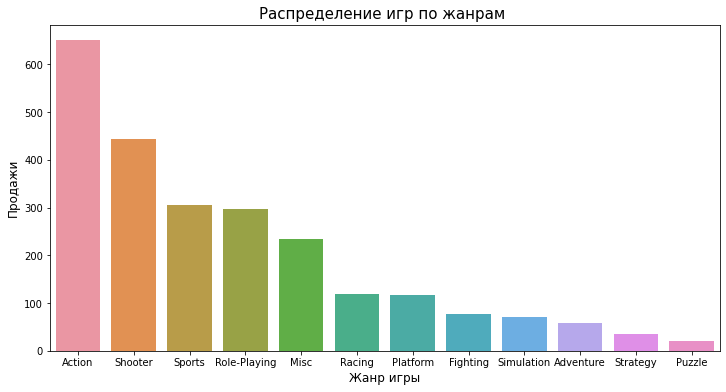

In [78]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=game_genre, x='genre', y='sales')
plt.xlabel('Жанр игры',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

* Лидирующую позицию по жанрам занимает "Action", далее "Shooter"
* Наименьший интерес у игр в жанре "Strategy" и "Puzzle"

In [79]:
game_genre = period_data.pivot_table(index='genre', values='sales', aggfunc='count').sort_values(
    by='sales', ascending=False).reset_index().rename_axis(None, axis=1)
game_genre

,genre,sales
0,Action,1336
1,Misc,552
2,Sports,531
3,Role-Playing,515
4,Adventure,507
5,Shooter,370
6,Racing,213
7,Simulation,200
8,Fighting,183
9,Strategy,160


Text(0, 0.5, 'Количество игр')

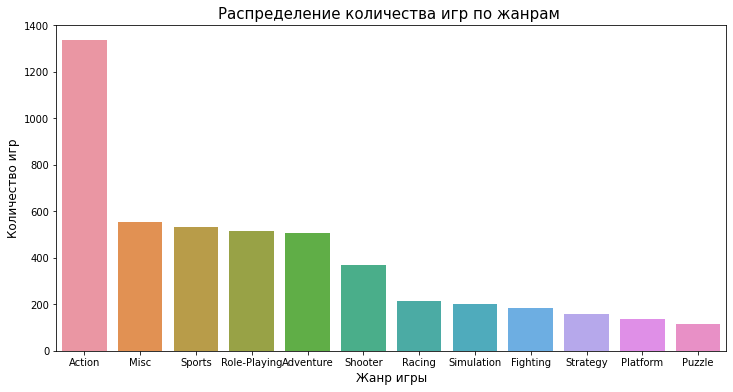

In [80]:
plt.figure(figsize=(12,6))
plt.title('Распределение количества игр по жанрам ',fontsize=15)
sns.barplot(data=game_genre, x='genre', y='sales')
plt.xlabel('Жанр игры',fontsize=12)
plt.ylabel('Количество игр',fontsize=12)

In [81]:
game_genre = period_data.pivot_table(index='genre', values='sales', aggfunc='median').sort_values(
    by='sales', ascending=False).reset_index().rename_axis(None, axis=1)
game_genre

,genre,sales
0,Shooter,0.410
1,Platform,0.240
2,Sports,0.200
3,Fighting,0.190
4,Racing,0.180
5,Action,0.160
6,Role-Playing,0.150
7,Misc,0.135
8,Simulation,0.115
9,Strategy,0.085


* Анализ медианных значений продаж по жанрам позволяет сделать выводы о том, что лучше продаются жанры: Shooter, Platform, Sports, Fighting, Racing

#### Вывод по исследовательскому анализу данных:
* Количество игровых платформ начало расти с большой скоростью с 90х годов до 2008 года 
* С 2008 года произошел спад, который можно связать с финансовым кризисом 2008 года, а также большим развитием приложений для игр 
* Cамые популярные игровые платформы за весь период: PS2, X360, PS3, WII, DS, PS.
* Средний период активной фазы развития платформ длится приблизительно 5 лет: период начала роста популярности и тенденции к снижению популярности
* Полный цикл проявления интереса к игре составляет 7-10 лет до полного затухания
* Топ 10 платформы с максимальными продажами за весь период уже не актуальны на момент 2016 года.
* В качестве выбора периода данных для прогноза на 2017 выбран промежуток 2010 - 2015 год как наиболее показательный, и затрагивающий как рост, так и спад популярности игр
* Исходя из графиков видно, что медианые за период 2010-2015 год наибольшие у платформ XOne, PS4, WiiU, X 360
* С учетом цикла развития игр из представленных в топе платформ в 2017 году продолжаться продажи PS4, XOne с трендом на увеличение продаж, а также продажи 3DS и WiiU c трендом на снижение продаж
* Продажи платформ PS3, X360, Wii, DS, PSP, PS2, PC в 2017 году достигнут минимума
* У анализируемых платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские оценки почти не играют значимой роли. 
* Самый популярный жанр за последние 10 лет: 'Action', наименее популярный: 'Puzzle'.


#### Портрет пользователя каждого региона

In [82]:
def user_location(row):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for index_location, ax in zip(list(['platform','genre','rating']),axes):
        table = period_data.pivot_table(index=index_location, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        display(table)
        sns.barplot(data=table, x=index_location, y=row, ax=ax)
        

plt.show()

,platform,na_sales
0,X360,335.24
1,PS3,229.80
2,Wii,122.62
3,PS4,87.25
4,3DS,78.97


,genre,na_sales
0,Action,284.97
1,Shooter,222.26
2,Sports,149.95
3,Misc,123.63
4,Role-Playing,106.16


,rating,na_sales
0,M,368.56
1,E,264.96
2,E10+,157.80
3,T,152.26
4,undefined,147.81


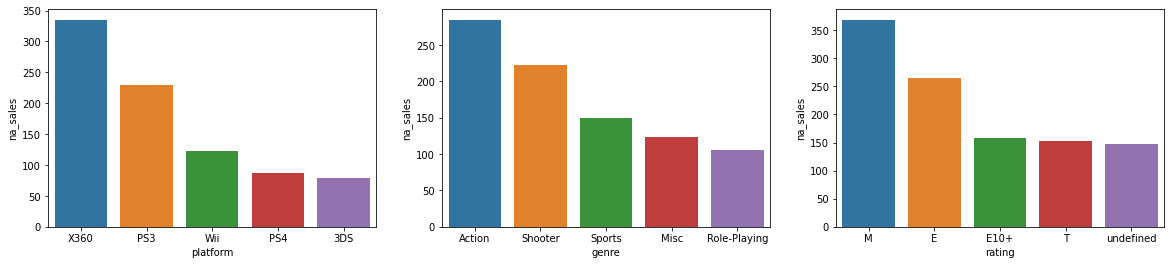

In [83]:
user_location('na_sales')

* Самые популярные игровые платформы в Северной Америке за актуальный период: X360, PS3, Wii, PS4, 3DS.
* Топ 5 жанров в Северной Америке за все время: action, shooter, sports, misc, role-playing.
* Наибольшее число продаж продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".


,platform,eu_sales
0,PS3,213.48
1,X360,163.58
2,PS4,109.31
3,PC,66.97
4,Wii,66.24


,genre,eu_sales
0,Action,226.02
1,Shooter,156.67
2,Sports,105.08
3,Role-Playing,71.20
4,Misc,65.89


,rating,eu_sales
0,M,277.75
1,E,184.37
2,undefined,132.06
3,T,103.50
4,E10+,97.35


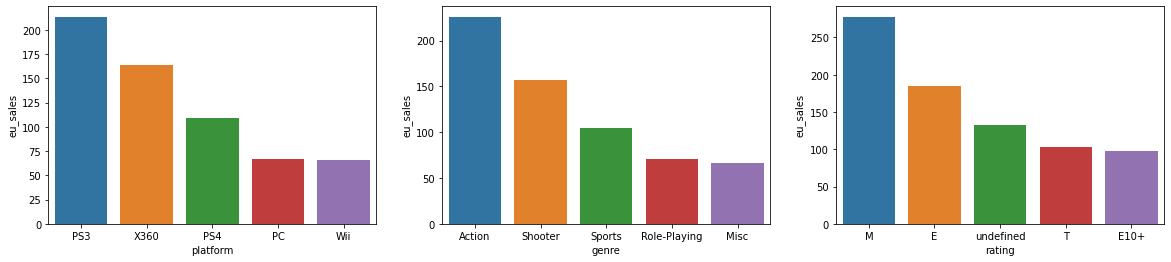

In [84]:
user_location('eu_sales')

* Самые популярные игровые платформы в Европе за актуальный период: PS3, X360, PS4, PC, Wii.
* Топ 5 жанров в Европе за все время: action, shooter, sports, role-playing, misc.
* Больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры, для которых рейтинг не определен

,platform,jp_sales
0,3DS,92.61
1,PS3,58.06
2,PSP,42.44
3,DS,27.90
4,PSV,18.28


,genre,jp_sales
0,Role-Playing,96.98
1,Action,65.14
2,Misc,23.50
3,Platform,15.70
4,Sports,14.61


,rating,jp_sales
0,undefined,157.49
1,E,46.80
2,T,39.87
3,M,29.27
4,E10+,12.77


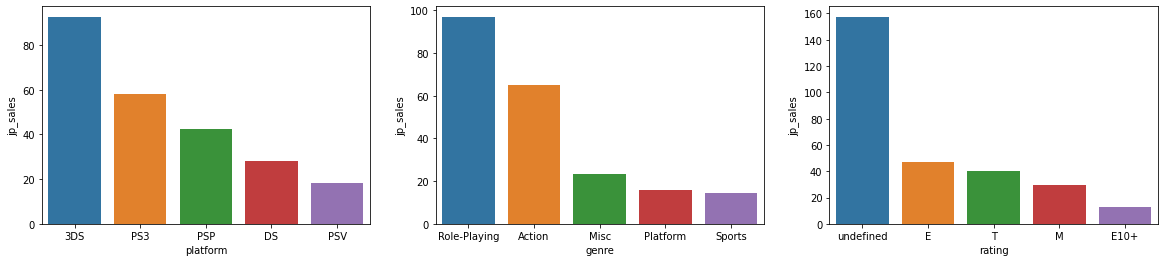

In [85]:
user_location('jp_sales')

* Самые популярные игровые платформы в Японии за актуальный период это: 3DS, PS3, PSP, DS, PSV.
* Топ 5 жанров в Японии за все время: role-playing, action, misc, platform, sports.
* Больше всего продаж за все время у игр с неопределенным рейтингом, на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

#### Общие выводы:
* В зависимости от региона пользовательские предпочтения различны:

##### Самые популярные игровые платформы: 
* в Северной Америке за актуальный период: X360, PS3, Wii, PS4, 3DS.
* в Европе за актуальный период: PS3, X360, PS4, PC, Wii
* в Японии за актуальный период: 3DS, PS3, PSP, DS, PSV

* В Северной Америке и Европе наиболее популярны за актуальный период те игры, которые продлжат продаваться в 2017 году в соответствии с анализом данных. В Японии предпочтения заметно отличаются, отстутсвует интерес к популярным в Америке и Европе платформам таким как X360, Wii.

* Предпочтения по жанрам схожие у пользователей из Северной Америки и Европы, в Японии заметно отличаются предпочтения
##### Самые популярные жанры:
* Топ 5 жанров в Северной Америке за актуальный период: action, shooter, sports, misc, role-playing.
* Топ 5 жанров в Европе за актуальный период: action, shooter, sports, role-playing, misc.
* Топ 5 жанров в Японии за актуальный период: role-playing, action, misc, platform, sports.

* В Северной Америке наибольшее число продаж продаж за актуальный период у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".
* Для Европы и Японии рейтинг ESRB не является определяющим, он используется в основном в Северной Америке, в Европе в меньшей степени, а Японии же больше всего продаж за все время у игр с неопределенным рейтингом.

### Проверка гипотез

* Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [86]:
xbox_data = period_data.query('platform == "XOne"')['user_score']
pc_data = period_data.query('platform == "PC"')['user_score']

In [87]:
mean_xbox = xbox_data.mean()
disp_xbox = np.var(xbox_data, ddof=1)
standart_xbox = np.std(xbox_data, ddof=1)
print ('Среднее значение пользовательской оценки Xbox one', mean_xbox)
print ('Дисперсия по пользовательской оценке Xbox one', disp_xbox)
print ('Стандартное отклонение по пользовательской оценке Xbox one', standart_xbox)

Среднее значение пользовательской оценки Xbox one 6.477586206896552
Дисперсия по пользовательской оценке Xbox one 1.6594932533733133
Стандартное отклонение по пользовательской оценке Xbox one 1.2882132018316352


In [88]:
mean_pc = pc_data.mean()
disp_pc = np.var(pc_data, ddof=1)
standart_pc = np.std(pc_data, ddof=1)
print ('Среднее значение пользовательской оценки PC', mean_pc)
print ('Дисперсия по пользовательской оценке PC', disp_pc)
print ('Стандартное отклонение по пользовательской оценке PC', standart_pc)

Среднее значение пользовательской оценки PC 6.560059171597634
Дисперсия по пользовательской оценке PC 2.3539192843221604
Стандартное отклонение по пользовательской оценке PC 1.5342487687210833


In [89]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(xbox_data.dropna(), pc_data.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5722790970703908
Не получилось отвергнуть нулевую гипотезу


При выбранном доверительном интервале не получилось отвергнуть нулевую гипотезу, т.о. средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
* Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [90]:
action_data = period_data.query('genre == "Action"')['user_score']
sports_data = period_data.query('genre == "Sports"')['user_score']

In [91]:
mean_action = action_data.mean()
disp_action = np.var(action_data, ddof=1)
standart_action = np.std(action_data, ddof=1)
print ('Среднее значение пользовательской оценки жанра Action', mean_action)
print ('Дисперсия по пользовательской оценке жанра Action', disp_action)
print ('Стандартное отклонение по пользовательской оценке жанра Action', standart_action)

Среднее значение пользовательской оценки жанра Action 6.807932011331444
Дисперсия по пользовательской оценке жанра Action 1.7997100435979345
Стандартное отклонение по пользовательской оценке жанра Action 1.3415327217768245


In [92]:
mean_sports = sports_data.mean()
disp_sports = np.var(sports_data, ddof=1)
standart_sports = np.std(sports_data, ddof=1)
print ('Среднее значение пользовательской оценки жанра Sports', mean_sports)
print ('Дисперсия по пользовательской оценке жанра Sports', disp_sports)
print ('Стандартное отклонение по пользовательской оценке жанра Sports', standart_sports)

Среднее значение пользовательской оценки жанра Sports 5.962007168458782
Дисперсия по пользовательской оценке жанра Sports 2.6315729352002273
Стандартное отклонение по пользовательской оценке жанра Sports 1.6222123582318768


In [93]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(action_data.dropna(), sports_data.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.58566038860007e-14
Отвергаем нулевую гипотезу


При выбранном доверительном интервале отвергаем нулевую гипотезу, т.о. Средние пользовательские рейтинги жанров Action и Sports различаются

#### Вывод по проверке гипотез
Для проверки гипотез использована функция ttest_ind, вычисляет t-тест двух независимых выборок:

* В первом случае нулевую гипотезу не удалось опровергнуть: средние пользовательские рейтинги платформ Xbox one и PC одинаковые. 
* Во втором случае отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные. 

### Общий вывод

* Были проанализированы данные на предмет аномальных значений, дубликатов, необходимо было привести к правильному типу столбец Year of Release, привести к нижнему регистру названия столбцов
* Наибольший процент пропусков (51,3%) в столбце с оценкой критиков, 40% пропусков в столбцах с оценкой пользователей и с рейтингом организации ESRB, небольшой процент пропусков в столбце с годом выпуска (1,6%)
* Аббревиатура tbd применительно в компьютерным играм расшифровывается как To Be Determined, то есть "Будет определено", т.о. можно заменить значения tbd на nan
* Данные рейтингов, как правило, пропущены во всех указанных столбцах одновременно
* Максимальное значение выпущенных игр приходится на 2007 - 2008 годы.
* С начала 90-х годов количество игр начинает ежегодно расти быстрыми темпоми. Можно попробовать это объяснить развитием технологий, появлением возможностей для покупки игр у большого числа пользователей. Данный рост продолжается до 2008 года.
* На дальнейшее развитие игр (после 2008 года) мог повлиять финансовый кризис 2008 года
* Топ 10 платформы с максимальными продажами за весь период уже не актуальны на момент 2016 года.
* Для дальнейшего анализа требовалось выбрать промежуток данных с учетом выявленного периода активной фазы развития платформ
* В качестве выбора периода данных выбран промежуток 2007 - 2016 год как наиболее показательный, и затрагивающий как рост, так и спад популярности игр
* Исходя из графиков видно, что медианые за период 2007-2016 год наибольшие у платформ X360, PS3, PS4, XOne, GBA
* Анализ данных по продажам топовых платформ за период 2007-2016 показывает что у всех платформ наблюдается снижение продаж
* С учетом цикла развития игр из представленных в топе платформ в 2017 году продолжаться продажи PS4, 3DS, XOne c трендом на снижение продаж
* Продажи платформ PS3, X360, Wii, DS, PSP, PS2, PC в 2017 году достигнут минимума
* У PS4, Xbox One, WiiU, 3DS наблюдается незначительгная связь между оценками критиков и продажами.
* Связь между оценками пользователей и продажами слабая у всех платформ, либо её совсем нет.
* Лидирующую позицию по жанрам занимает "Action", далее "Shooter"
* Наименьший интерес у игр в жанре "Strategy" и "Puzzle"
* В зависимости от региона пользовательские предпочтения различны:
* Самые популярные игровые платформы: в Северной Америке за весь период: X360, PS2, Wii, PS3, DS, в Европе за все время: PS2, PS3, X360, Wii, PS, в Японии за все время это: DS, PS, PS2, SNES, 3DS
* Предпочтения по жанрам схожие у пользователей из Северной Америки и Европы, в Японии заметно отличаются предпочтения
* Самые популярные жанры: Топ 5 жанров в Северной Америке за все время: action, sports, shooter, platform, misc, Топ 5 жанров в Европе за все время: action, sports, shooter, racing, misc, Топ 5 жанров в Японии за все время: role-playing, action, sports, platform, misc.
* Наибольшее число продаж продаж за все время у игр с рейтингом "для всех" независимо от региона, на втором месте в Северной Америке и Японии месте игры с рейтингом "от 13 и выше", в Европе - игры с рейтингом "от 17 и выше".
* Для проверки гипотез использована функция ttest_ind, вычисляет t-тест двух независимых выборок:
* В первом случае нулевую гипотезу не удалось опровергнуть: средние пользовательские рейтинги платформ Xbox one и PC одинаковые.
* Во втором случае отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.



* Перед анализом данных были  подготовлены данные, приведены к правильным данным столбцы, приведены к нижнему регистру названия колонок. Были приведены к правильным типам данных необходимые столбцы. 
* В ходе анализа было выявилено, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. С 2008 года произошел резкий спад разработок консольных игр. 
* За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS. Было выявлено что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли. У платформ лидеров наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки не играют значимой роли. 
* Был выбран в качестве актуального период 2010 - 2015 год, медиана продаж за актуальный период наибольшие у платформ XOne, PS4, WiiU, X 360. С учетом цикла развития игр из представленных в топе платформ в 2017 году продолжаться продажи PS4, XOne с трендом на увеличение продаж, а также продажи 3DS и WiiU c трендом на снижение продаж. Продажи платформ PS3, X360, Wii, DS, PSP, PS2, PC в 2017 году достигнут минимума.
* Были составлены портреты пользователей каждого региона за актуальный период: заметно различие предпочтений в выборе игр у пользователей из Японии, для них актуальными являются не те игры, которые пользуются популярностью в Северной Америке и Европе: в Северной Америке за актуальный период: X360, PS3, Wii, PS4, 3DS, в Европе за актуальный период: PS3, X360, PS4, PC, Wii, в Японии за актуальный период: 3DS, PS3, PSP, DS, PSV.
* Рейтинг ESRB применяется в основном в Северной Америке, для Европы и Японии не применим.
